# _Work smart! Use what was developed before._

Potencjał, możliwości i rozwinięcie biblioteki *pylfsr*. Od postawy o rejestrach przesuwnych liniowych, przykłady i wykorzystanie do rejestrów nielinowych.  

Żeby wszystko działało polecenia i kod muszą być wykonywane z góry do dołu.


# Wprowadzenie

Linear-feedback shift register (LFSR)  
Rejestr przesuwający z liniowym sprzężeniem zwrotnym  
Rejestr przesuwający, którego bit wejściowy jest funkcją liniową jego poprzedniego stanu  

Na zdjęciach poniżej można zobaczyć jak dla 5bitowego rejestru xorowane są 4 wartości w nową wartość, która staje się bitem początkowym.

![State1](assets/l1.png "State 1")
![State2](assets/l2.png "State 2")

Najważniejszym elementem w LFSR są wielomiany pierwotne oraz operacja XOR. Operacja XOR umożliwa rozkład zer i jedynek porównywalny do poziomu 50%. Wielomiany pierwotne zgodnie z algebrą będą generowały najdłuższe możliwe okresy przez co generowany strumień będzie bardziej losowy.

Przykładowa inicjalizacja obiektu, z przejściem do kolejnego stanu.
Należy zdefiniować stan początkowy dla rejestru oraz które wartości rejestru będą uwzględniane w sprzężeniu zwrotnym (_Feedback polynomial_)
Przy inicjalizacji _Output bit_ i _Feedback bit_ nie istnieją dlatego mają wartość -1.

Obiekt rejestru przechowuje wszystkie potrzebne informacje. Między innymi o bicie wychodzącym, bicie sprzężającym i aktualnym stanie rejestru.


In [14]:
from pylfsr import LFSR

state=[1,0,1,0,1]
polynomial=[4,3,2,1]
L=LFSR(initstate=state, fpoly=polynomial, verbose=True)

L.info()

L.next()
L.next()


ModuleNotFoundError: No module named 'pylfsr'


Rejestr przesuwny stosuje się w celu genereowania pseudolosowych liczb.   

Interesuje nas okresowość rejestrów. Najlepiej jak jest maksymalny.   
Maksymalny okres dla danego rejestru to taki, gdzie stowarzyszony z nim wielomian jest wielomianem pierwotnym.   
W odniesieniu do rejestru przesuwnego ten _wielomian_ wskazuje które bity należy ze sobą XOR-ować, żeby uzyskać _feedback bit_.  
Nie ważne jaki będzie stan inicjalizacyjny bo wielomian pierowtny sprawi, że rejestr przejdzie przez wszystkie możliwe stany.  

Ilość wielomianów pierwotnych dla zadanej długości można obliczyć z funkcji Eulera.   
Lub wyciągnąć ją z odpowiedniej funkcji w bibliotece :)    
Natomiast w internecie można znaleźć rozpisaną listę wielomianów pierwotnych do 32 potęgi.  
[partow.net/programming/polynomials](https://www.partow.net/programming/polynomials/index.html)  

Zgodnie z algebrą takie wielomiany gwarantują maksymalny okres przez co są najlepszym rozwiązaniem w rejestrach przesuwnych.  
Funkcja _get_fpolyList()_ zawiera listę wielomianów.


In [ ]:
# Lista wszystkich możliwych wielomianów pierwotnych do 32 potęgi

# fpolyDict = L.get_fpolyList()
# print(fpolyDict)

# Lista możliwych wielomianów pierwotnych dla danej potęgi
fpolys = L.get_fpolyList(m=7)
print(fpolys)

[[7, 1], [7, 3], [7, 3, 2, 1], [7, 4, 3, 2], [7, 5, 4, 3, 2, 1], [7, 6, 3, 1], [7, 6, 4, 2], [7, 6, 5, 2], [7, 6, 5, 4, 2, 1]]


Jak działa rejestr przesuwny w akcji. Poniżej został zdefiniowany prosty 4 bitowy rejestr.  
Każdy stan jest wypisywany razem z aktualnym bitem wyjściowym oraz zwrotnym. _Feedback bit_ wchodzi na początek rejestru a _Output bit_ opuszcza go.  
Na sam koniec jest sprawdzona proporcja zer i jedynek. Jest bliska 50% - tak jak powinno być.  

In [ ]:
state=[1,1,1,0]
# Sprawdzenie wielomianów pierwotnych dla m=4
# print(L.get_fpolyList(m=4)) # [4,1]

polynomial=[4,1]
L=LFSR(initstate=state, fpoly=polynomial, verbose=True)

out=''

print(f'feedback bit {L.feedbackbit} | ', end='')
for _ in range(2**(len(state)) - 1):
    L.next()
    print(f'feedback bit {L.feedbackbit} | ', end='')
    out += ''.join(str(L.outbit))
    
print('S: ', L.state) # Powrót do pierwszego stanu po przejściu całego okresu

print('output bits', out)

print('number of 0s: ', out.count('0'))
print('number of 1s: ', out.count('1'))

feedback bit -1 | S:  [1 1 1 0]
feedback bit 1 | S:  [1 1 1 1]
feedback bit 0 | S:  [0 1 1 1]
feedback bit 1 | S:  [1 0 1 1]
feedback bit 0 | S:  [0 1 0 1]
feedback bit 1 | S:  [1 0 1 0]
feedback bit 1 | S:  [1 1 0 1]
feedback bit 0 | S:  [0 1 1 0]
feedback bit 0 | S:  [0 0 1 1]
feedback bit 1 | S:  [1 0 0 1]
feedback bit 0 | S:  [0 1 0 0]
feedback bit 0 | S:  [0 0 1 0]
feedback bit 0 | S:  [0 0 0 1]
feedback bit 1 | S:  [1 0 0 0]
feedback bit 1 | S:  [1 1 0 0]
feedback bit 1 | S:  [1 1 1 0]
output bits 011110101100100
number of 0s:  7
number of 1s:  8


Narzędzie umożliwia również wizualizację każdego stanu.  Poniżej można wygenerować każdy stan i zobaczyc jak się zmieniał.

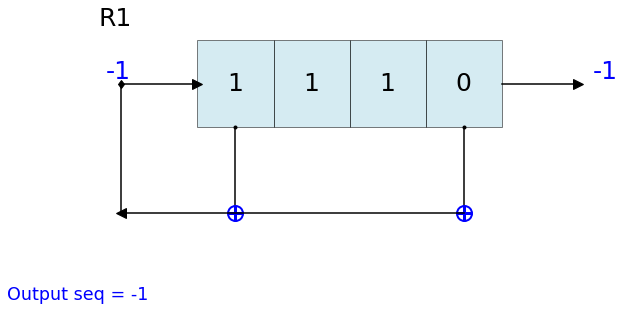

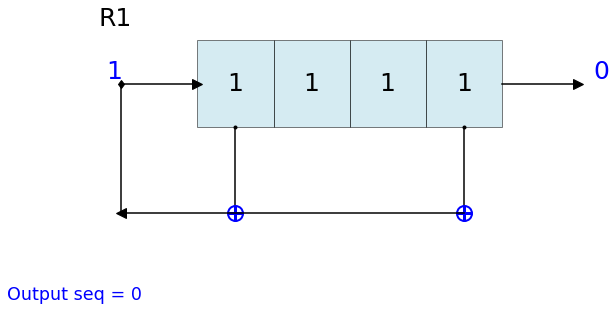

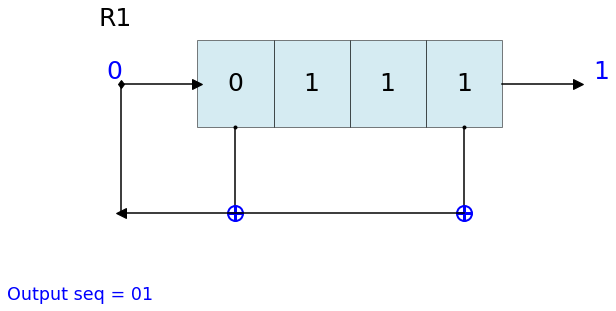

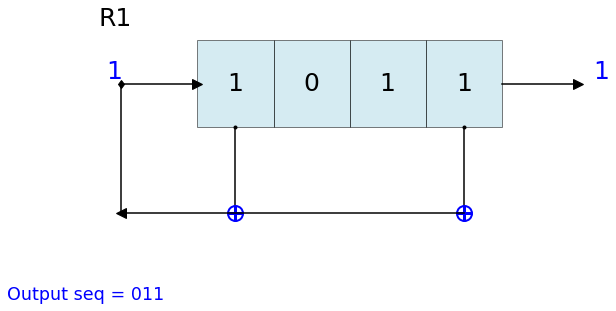

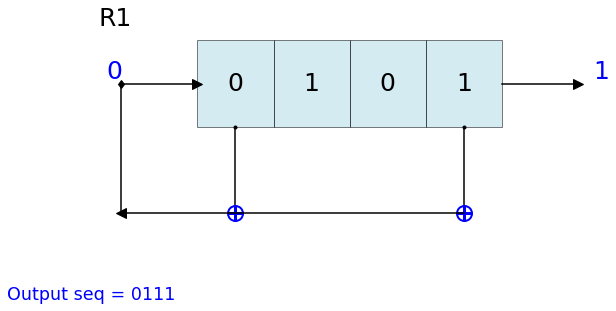

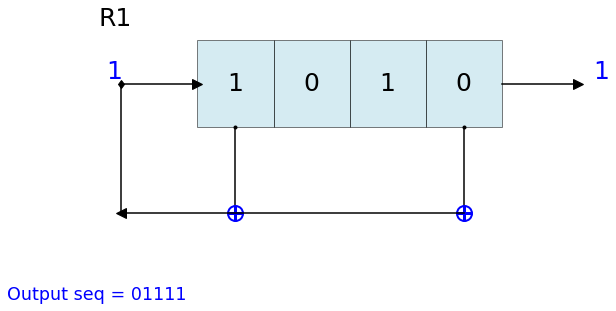

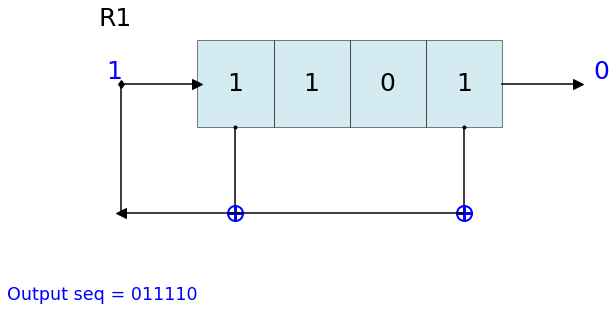

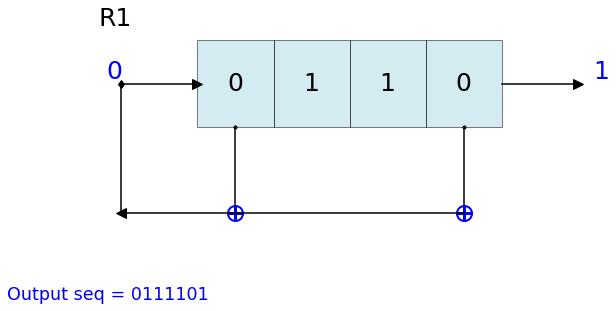

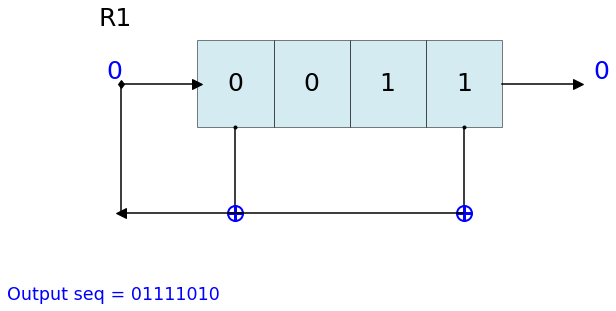

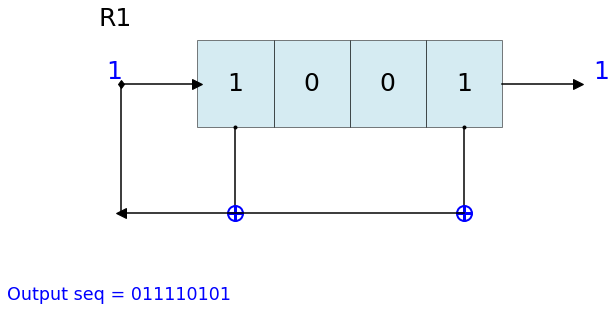

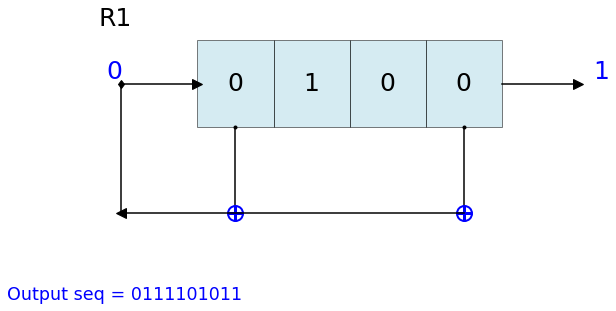

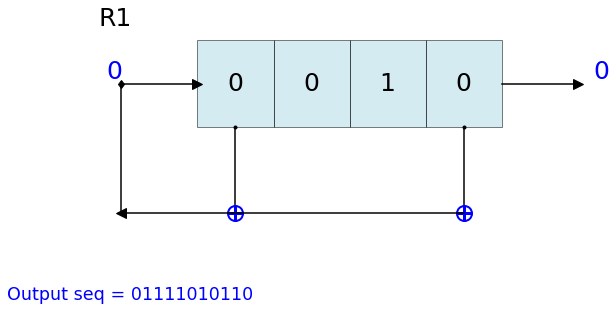

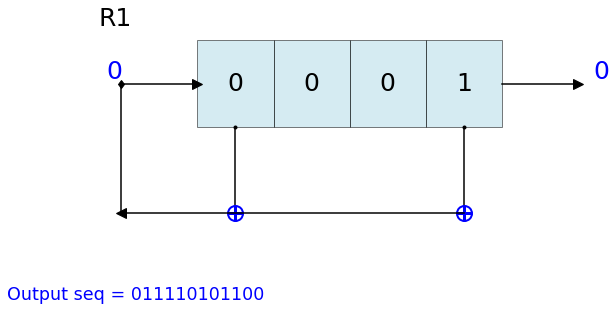

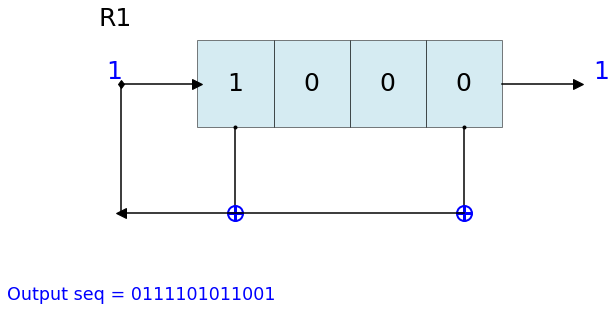

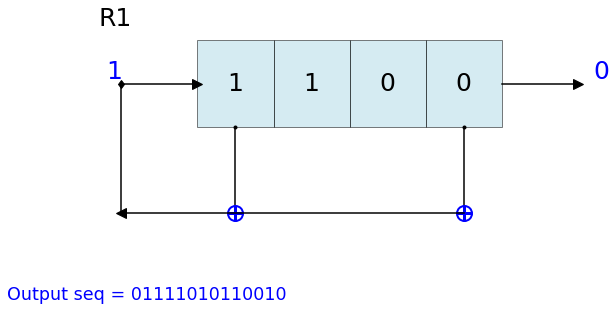

In [ ]:
L=LFSR(initstate=[1,1,1,0], fpoly=[4,1])

for _ in range(15):
  L.Viz(title='R1')
  L.next()


Sposób wizualizacji każdego stanu proponowany w [dokumentacji](https://lfsr.readthedocs.io/en/latest/LFSR_Examples.html#example-7-1-visualize-3-bit-lfsr-at-each-step-with-default-counter-start-zero-true)

In [ ]:
L=LFSR(initstate=[1,1,1,0], fpoly=[4,1])
print('count \t state \t\toutbit \t seq')
print('-'*50)
for _ in range(15):
    print(L.count,L.state,'',L.outbit,L.seq,sep='\t')
    L.next()
print('-'*50)
print('Output: ',L.seq)

count 	 state 		outbit 	 seq
--------------------------------------------------
0	[1 1 1 0]		-1	[-1]
1	[1 1 1 1]		0	[0]
2	[0 1 1 1]		1	[0 1]
3	[1 0 1 1]		1	[0 1 1]
4	[0 1 0 1]		1	[0 1 1 1]
5	[1 0 1 0]		1	[0 1 1 1 1]
6	[1 1 0 1]		0	[0 1 1 1 1 0]
7	[0 1 1 0]		1	[0 1 1 1 1 0 1]
8	[0 0 1 1]		0	[0 1 1 1 1 0 1 0]
9	[1 0 0 1]		1	[0 1 1 1 1 0 1 0 1]
10	[0 1 0 0]		1	[0 1 1 1 1 0 1 0 1 1]
11	[0 0 1 0]		0	[0 1 1 1 1 0 1 0 1 1 0]
12	[0 0 0 1]		0	[0 1 1 1 1 0 1 0 1 1 0 0]
13	[1 0 0 0]		1	[0 1 1 1 1 0 1 0 1 1 0 0 1]
14	[1 1 0 0]		0	[0 1 1 1 1 0 1 0 1 1 0 0 1 0]
--------------------------------------------------
Output:  [0 1 1 1 1 0 1 0 1 1 0 0 1 0 0]


## Testowanie wielomianów pierwotnych
Funkcja _test_properties()_ sprawdzi dla danego stanu rejestru i zaproponowanego wielomianiu czy może on być wielomianem pierwotnym.

1. Periodicity
------------------
 - Expected period = 2^M-1 = 15
 - Pass?:  False

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period): (N1s,N0s) =  (10, 5)
 - Pass?:  False

3. Runlength Property
-------------------
 - Number of Runs in a period should be of specific order, e.g. [4,2,1,1]
 - Runs:  [1 3 0 2]
 - Pass?:  False

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else
 - Rxx(k):  [ 1.          0.2        -0.33333333 -0.06666667 -0.06666667  0.2
  0.46666667 -0.06666667 -0.06666667  0.46666667  0.2        -0.06666667
 -0.06666667 -0.33333333  0.2         1.          0.2        -0.33333333
 -0.06666667 -0.06666667  0.2         0.46666667 -0.06666667 -0.06666667
  0.46666667  0.2        -0.06666667 -0.06666667 -0.33333333  0.2
  1.        ]


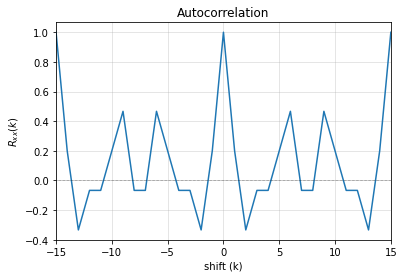

 - Pass?:  False



Failed one or more tests, check if feedback polynomial is primitive polynomial
1. Periodicity
------------------
 - Expected period = 2^M-1 = 15
 - Pass?:  True

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period): (N1s,N0s) =  (8, 7)
 - Pass?:  True

3. Runlength Property
-------------------
 - Number of Runs in a period should be of specific order, e.g. [4,2,1,1]
 - Runs:  [4 2 1 1]
 - Pass?:  True

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else
 - Rxx(k):  [ 1.         -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667
 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667
 -0.06666667 -0.06666667 -0.06666667  1.         -0.06666667 -0.06666667
 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667
 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667
  1.        ]


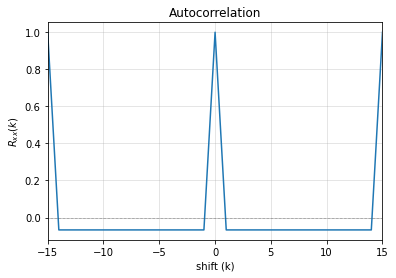

 - Pass?:  True



Passed all the tests


In [ ]:
L=LFSR(initstate=[1,1,1,0], fpoly=[4,2]) # Zły
result  = L.test_properties(verbose=2)

L=LFSR(initstate=[1,1,1,0], fpoly=[4,1]) # Dobry
result  = L.test_properties(verbose=2)

## NLFSR

Poiżej można znaleźć naszą implementację szyfru NLFSR przy użyciu 2 SBOXÓW oraz 3 operacji modulo.

Źródła:
https://lfsr.readthedocs.io/en/latest/LFSR_Examples.html#installation
https://www.partow.net/programming/polynomials/index.html
https://pl.wikipedia.org/wiki/Rejestr_przesuwaj%C4%85cy_z_liniowym_sprz%C4%99%C5%BCeniem_zwrotnym
https://pl.wikipedia.org/wiki/Szyfr_strumieniowy

#TODO
Ujednolicić nazewnictwo. Albo wszędzie np. _fedback bit_ albo _bit sprzężający_ (?)  
Uporzadkować i usunąć powtórzenia bo na pewno gdzieś są

In [16]:
import sys
sys.path.append('..')

from lib import pylfsr

state=[1,0,1,0,1]
L=pylfsr.LFSR(initstate=state, verbose=True,nonlinear=True)

L.info()

for _ in range(0,11):
    L.next()



5 bit LFSR with feedback polynomial  x^5 + x^2 + 1
Expected Period (if polynomial is primitive) =  31
Current :
 State        :  [1 0 1 0 1]
 Count        :  0
 Output bit   :  -1
 feedback bit :  -1
S:  [1 0 1 0 1]
S:  [1 1 0 1 0]
S:  [0 1 1 0 1]
S:  [0 0 1 1 0]
S:  [1 0 0 1 1]
S:  [0 1 0 0 1]
S:  [0 0 1 0 0]
S:  [1 0 0 1 0]
S:  [1 1 0 0 1]
S:  [1 1 1 0 0]
S:  [1 1 1 1 0]
